In [246]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

The objective is to make a prediction on the Customer Lifetime Value (CLV) for an automobile insurance company. CLV is the total profit earned from a customer during their association with a company. Having knowledge of the CLV of each customer enables the company to determine how much they should allocate for customer acquisition. It is possible for the acquisition cost of a customer to exceed their purchase value, however, fostering the relationship with the customer could increase their CLV to a level that makes the investment worthwhile. Understanding the significance of CLV is crucial for success in the customer-centric market.

In [247]:
df = pd.read_csv('/kaggle/input/ibm-watson-marketing-customer-value-data/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')

In [248]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [250]:
#we must edit the columns as per date format
df['Effective To Date'] = df['Effective To Date'].astype('datetime64[ns]')

There are  around 9000 records wwith 24 distint variable

In [251]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,8004.94,6870.97,1898.01,3994.25,5780.18,8962.17,83325.38
Income,9134.0,37657.38,30379.90,0.00,0.00,33889.50,62320.00,99981.00
Monthly Premium Auto,9134.0,93.22,34.41,61.00,68.00,83.00,109.00,298.00
Months Since Last Claim,9134.0,15.10,10.07,0.00,6.00,14.00,23.00,35.00
Months Since Policy Inception,9134.0,48.06,27.91,0.00,24.00,48.00,71.00,99.00
Number of Open Complaints,9134.0,0.38,0.91,0.00,0.00,0.00,0.00,5.00
Number of Policies,9134.0,2.97,2.39,1.00,1.00,2.00,4.00,9.00
Total Claim Amount,9134.0,434.09,290.50,0.10,272.26,383.95,547.51,2893.24


In [252]:
df.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

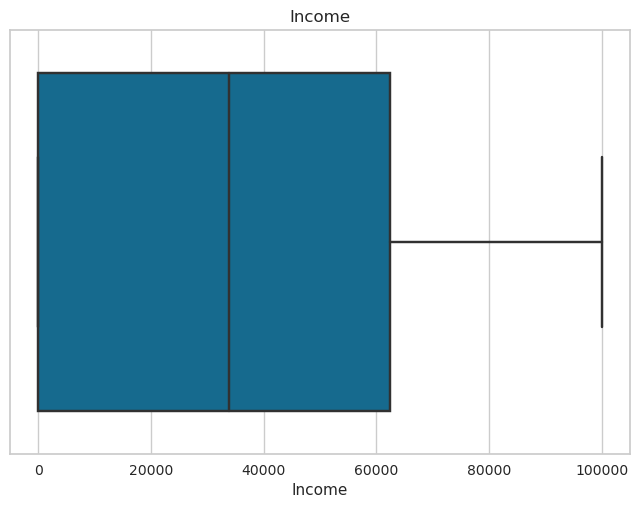

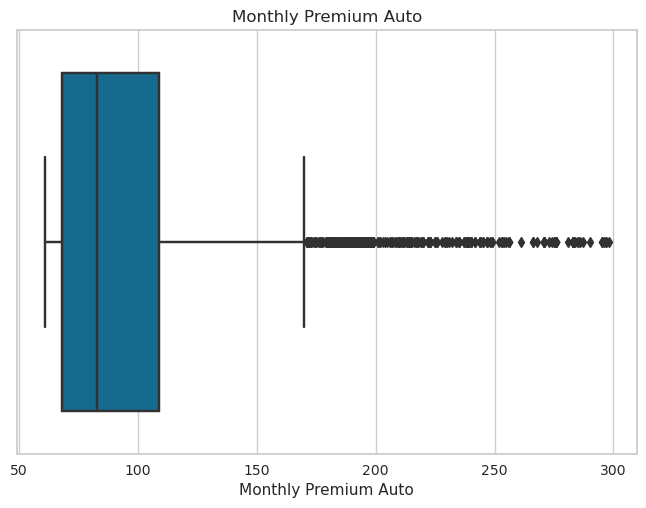

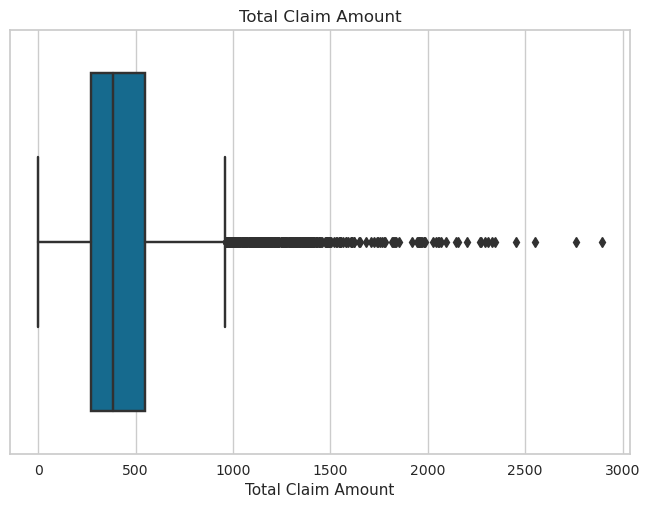

In [253]:
countt = ['Income', 'Monthly Premium Auto', 'Total Claim Amount']

for var in countt:
    sns.boxplot(x=df[var])
    plt.title(var)
    plt.show()

The box plot analysis reveals the presence of outliers in the variables "Total Claim Amount" and "Monthly Premium Auto", whereas no outliers are found in the "Income" variable. Typically, to improve the model performance, outliers are removed. However, since the data pertains to the insurance industry, the outliers could represent potential customers. Therefore, we will investigate alternative models that consider both the scenarios of including and excluding the outliers.

In [254]:
#checking all categorical variables to jott down significant ones.

cat_df = df.select_dtypes(include='object')
cat_df = cat_df.drop(['Customer'], axis = 1)
cols = cat_df.columns
cols

Index(['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus',
       'Gender', 'Location Code', 'Marital Status', 'Policy Type', 'Policy',
       'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

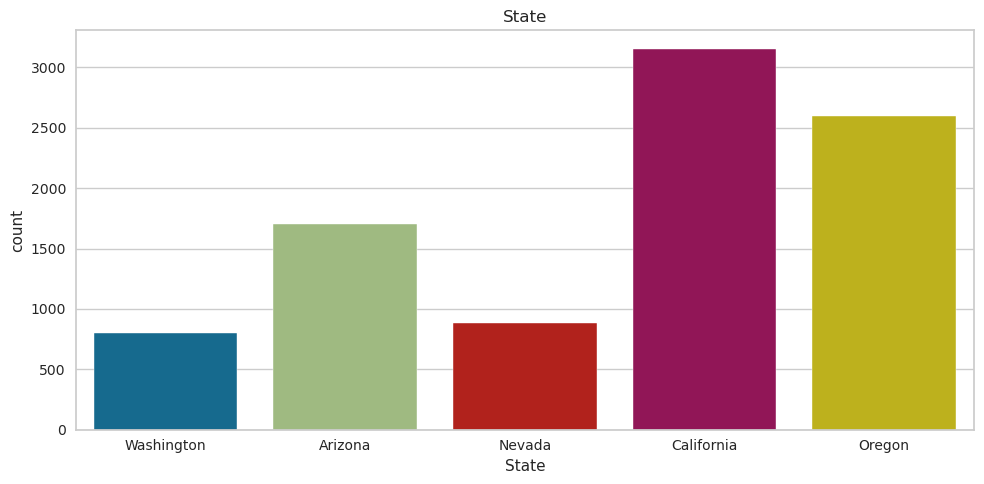

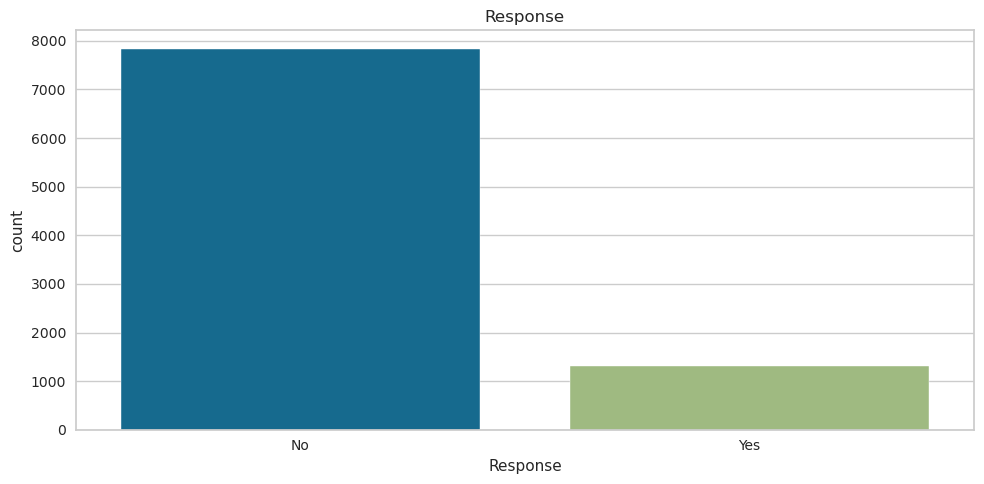

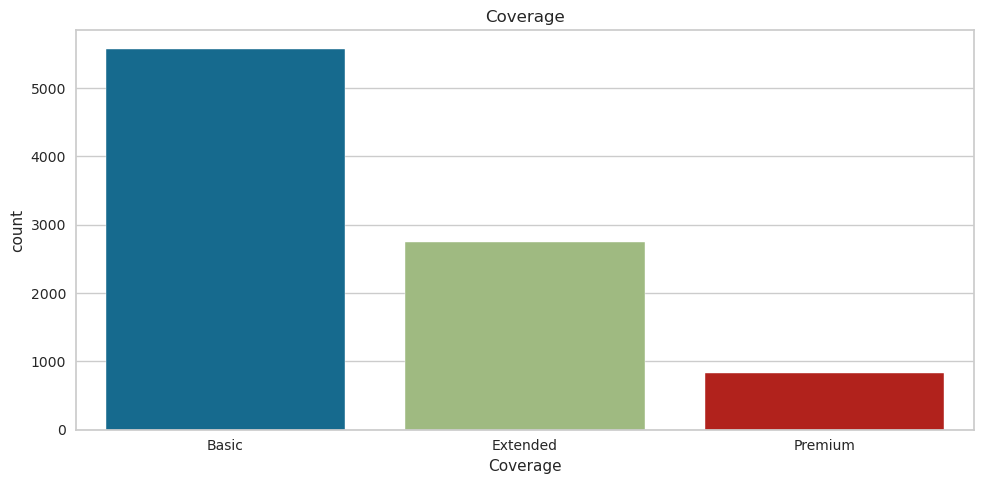

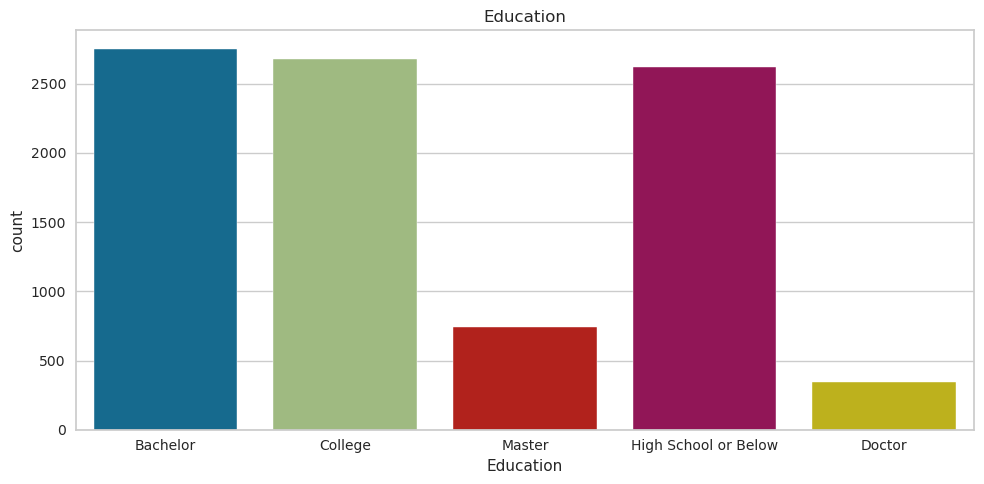

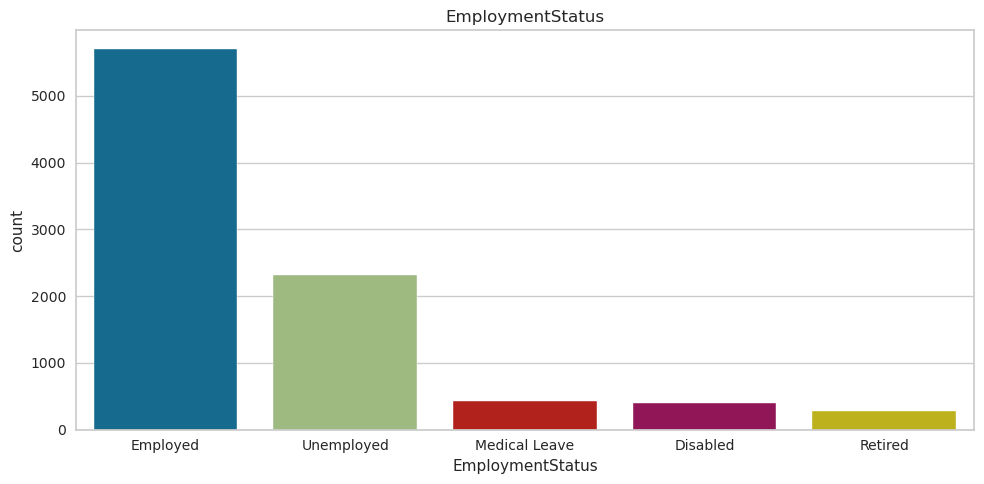

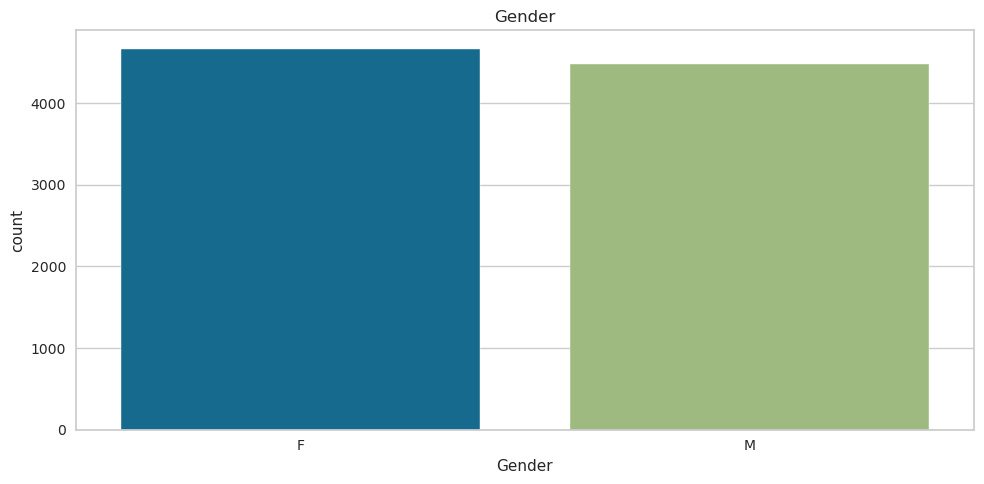

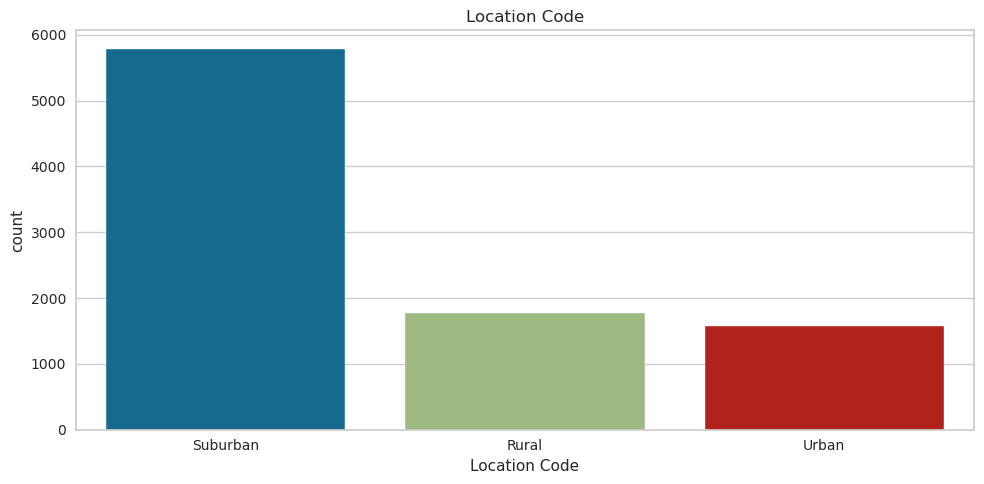

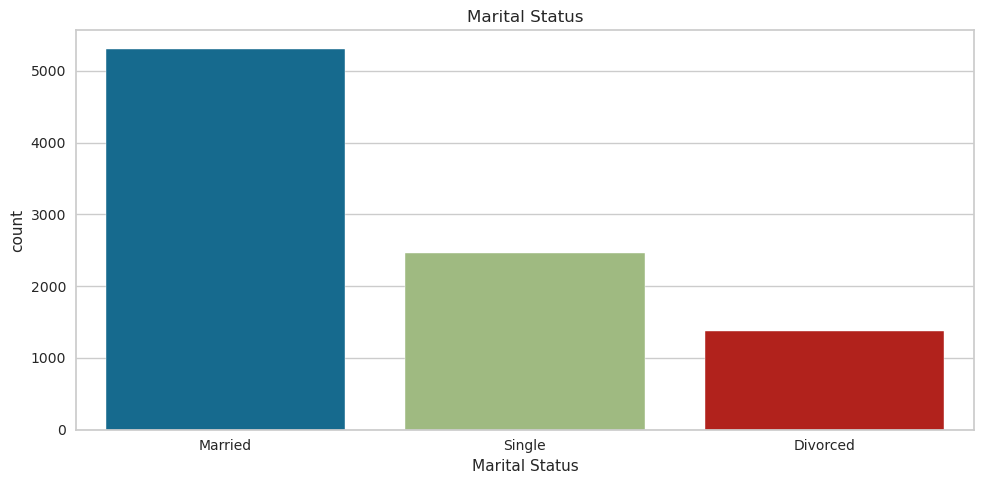

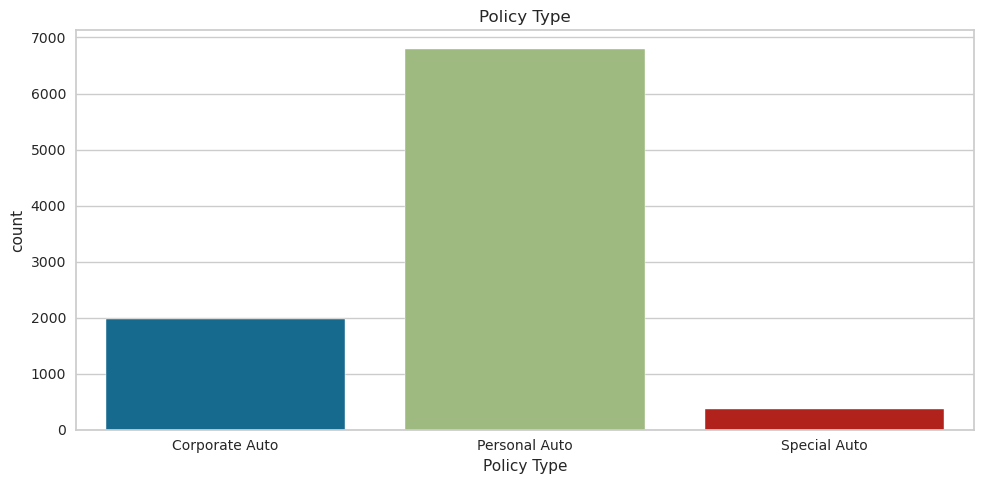

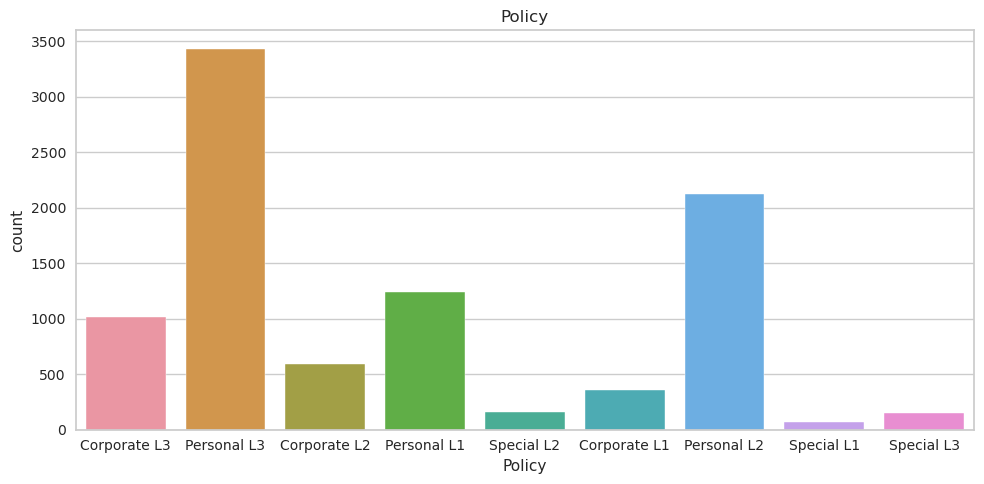

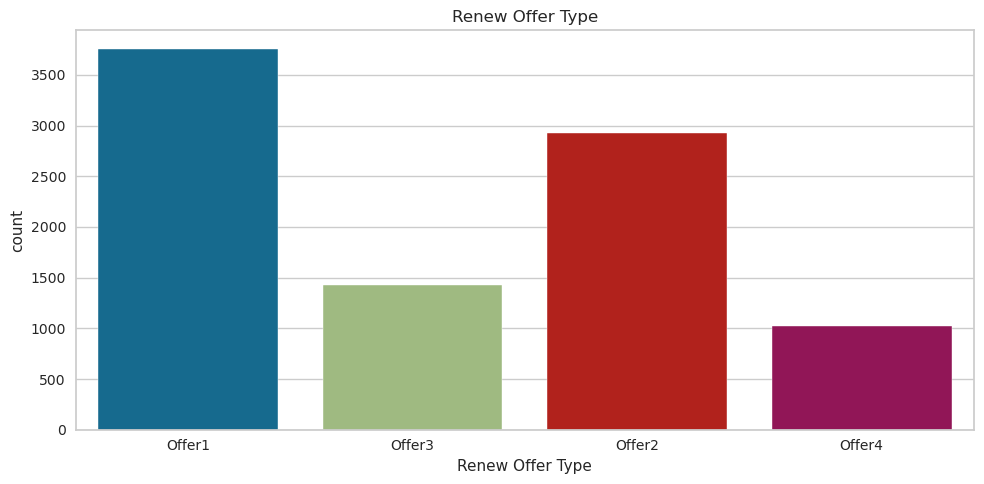

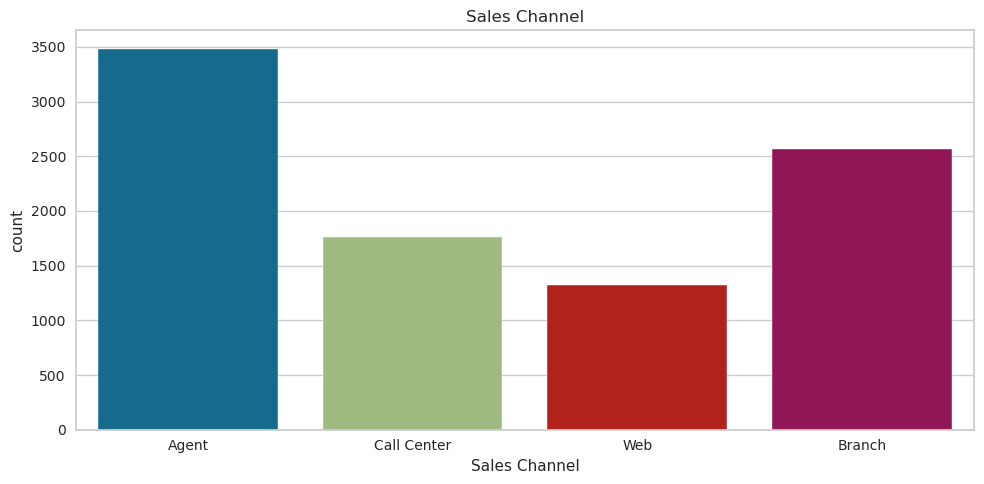

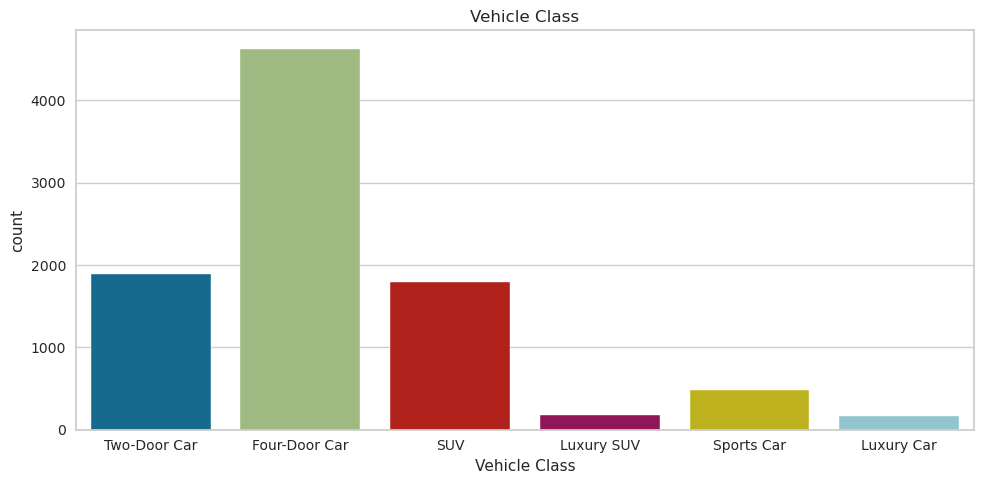

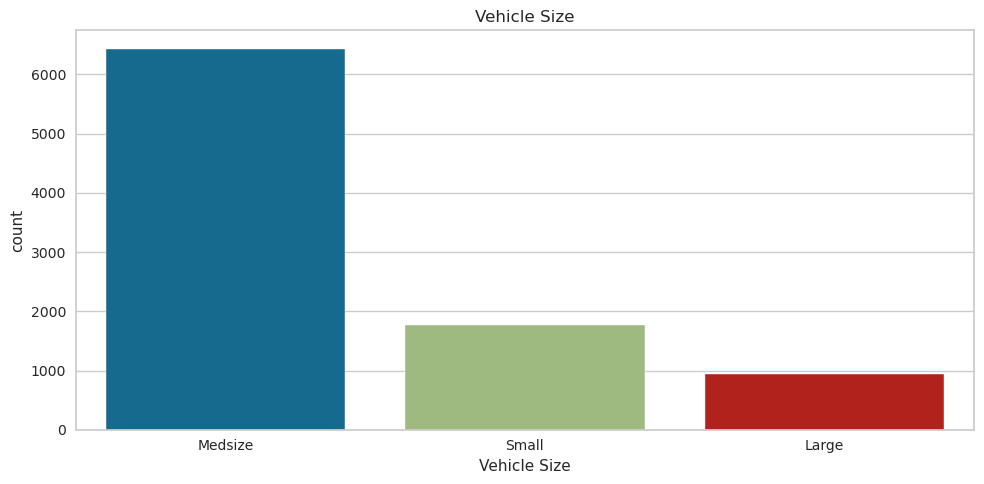

In [255]:
for var in cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=df[var])
    plt.title(var)
    plt.tight_layout()
    plt.show()

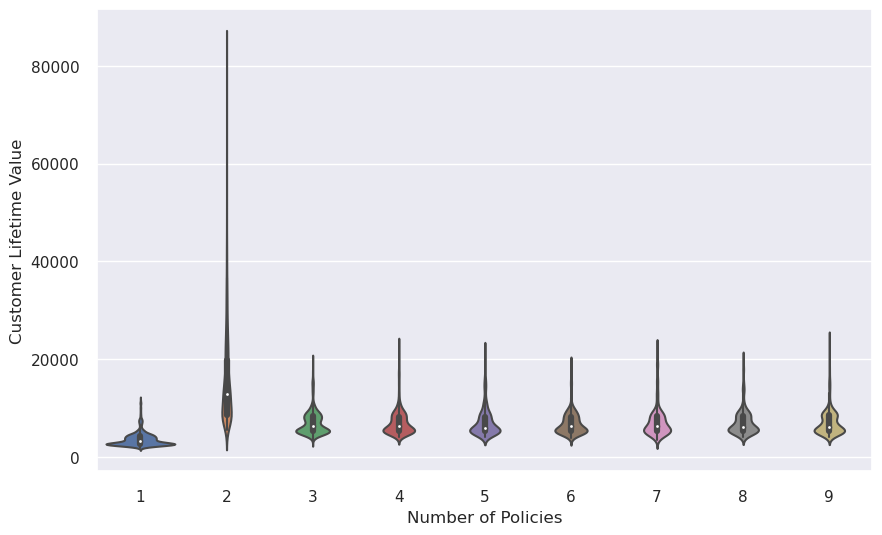

In [256]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,6))
ax = sns.violinplot(x="Number of Policies", y="Customer Lifetime Value", data=df)

The graph indicates that customers who have only taken one policy have a lower customer lifetime value, while those who have taken three or more policies exhibit a similar trend. Therefore, these groups can be combined into a single bin. Additionally, the graph shows that customers who have taken two policies have a significantly higher customer lifetime value compared to the other groups. Moreover, the graph suggests that the customer lifetime value varies depending on the type of coverage selected.

## Statistical Analysis
To gain a better understanding of how each independent variable is impacting the target variable, Customer Lifetime Value (CLV), it is necessary to conduct a statistical analysis. Since CLV is a continuous variable, we will need to perform an **F-test or ANOVA** to determine the significance of each independent variable in relation to the target variable. This will enable us to obtain more precise and statistically significant results.

In [257]:
gender = df[['Customer Lifetime Value','Gender']].groupby('Gender')
female = gender['Customer Lifetime Value'].get_group('F')
male = gender['Customer Lifetime Value'].get_group('M')

In [258]:
import scipy.stats as stats
F, p =  stats.ttest_ind(female,male)

print("F-statistic:", F)
print("p-value:", p)

F-statistic: 1.300686352501256
p-value: 0.19339865630769232


If the **p-value is greater than 0.05**, it indicates that there is no significant variation in the average value of the target variable across different genders. This implies that the 'Gender' feature does not have a significant impact on predicting the 'Customer Lifetime Value', as it is not a strong indicator of the target variable. Therefore, **the gender of the customer is not a significant factor in determining the 'Customer Lifetime Value' in this context.**

In [259]:
# Test whether Covarage differences are significant or not.
Coverage = df[['Customer Lifetime Value','Coverage']].groupby('Coverage')
Basic = Coverage['Customer Lifetime Value'].get_group('Basic')
Extended = Coverage['Customer Lifetime Value'].get_group('Extended')
Premium =Coverage['Customer Lifetime Value'].get_group('Premium')

F, p = stats.f_oneway(Basic,Extended,Premium)
print("F-statistic:", F)
print("p-value:", p)

F-statistic: 133.67511419504905
p-value: 6.0158970099807e-58


If **the p-value is greater than 0.05**, it suggests that there is no notable variation in the average value of the target variable with regard to different types of 'Coverage'. This implies that the 'Coverage' feature is not a significant factor for predicting the 'Customer Lifetime Value' since it does not strongly influence the target variable. **Therefore, in this context, the 'Coverage' feature is not a significant predictor of the 'Customer Lifetime Value'.**

In [260]:
# Test whether Marital Status differences are significant or not.

Marital = df[['Customer Lifetime Value','Marital Status']].groupby('Marital Status')
married = Marital['Customer Lifetime Value'].get_group('Married')
single = Marital['Customer Lifetime Value'].get_group('Single')

F, p = stats.ttest_ind(married,single)
print("F-statistic:", F)
print("p-value:", p)

F-statistic: 2.1813329263939916
p-value: 0.029188701551162235


If the **p-value is less than 0.05**, it indicates that there is a considerable difference in the average value of the target variable among at least one group of the 'Marital Status' feature. This implies that 'Marital Status' could be a significant predictor of the 'Customer Lifetime Value', as it has a strong impact on the target variable. Therefore, **in this context, the 'Marital Status' feature is likely to be a relevant feature for predicting the 'Customer Lifetime Value' and could be included in the predictive model.**

In [261]:
# Test whether Vehicle Class differences are significant or not.

Vehicleclass = df[['Customer Lifetime Value','Vehicle Class']].groupby('Vehicle Class')
fourdoor = Vehicleclass['Customer Lifetime Value'].get_group('Four-Door Car')
twodoor = Vehicleclass['Customer Lifetime Value'].get_group('Two-Door Car')
suv = Vehicleclass['Customer Lifetime Value'].get_group('SUV')
luxurysuv =Vehicleclass['Customer Lifetime Value'].get_group('Luxury SUV')
luxurycar =Vehicleclass['Customer Lifetime Value'].get_group('Luxury Car')
sportscar =Vehicleclass['Customer Lifetime Value'].get_group('Sports Car')

F, p = stats.f_oneway(fourdoor,twodoor,suv,luxurysuv,luxurycar,sportscar)
print("F-statistic:", F)
print("p-value:", p)

F-statistic: 267.1581168024349
p-value: 2.085525760212929e-267


In [262]:
# Test whether Renew Offer Type differences are significant or not.

Renewoffer = df[['Customer Lifetime Value','Renew Offer Type']].groupby('Renew Offer Type')
offer1 = Renewoffer['Customer Lifetime Value'].get_group('Offer1')
offer2 = Renewoffer['Customer Lifetime Value'].get_group('Offer2')
offer3 = Renewoffer['Customer Lifetime Value'].get_group('Offer3')
offer4 =Renewoffer['Customer Lifetime Value'].get_group('Offer4')

F, p = stats.f_oneway(offer1,offer2,offer3,offer4)
print("F-statistic:", F)
print("p-value:", p)

F-statistic: 25.832614444940408
p-value: 1.238399930571374e-16


In [263]:
# Test whether EmploymentStatus differences are significant or not.


EmploymentStatus = df[['Customer Lifetime Value','EmploymentStatus']].groupby('EmploymentStatus')
employed = EmploymentStatus['Customer Lifetime Value'].get_group('Employed')
unemployed = EmploymentStatus['Customer Lifetime Value'].get_group('Unemployed')
medleave = EmploymentStatus['Customer Lifetime Value'].get_group('Medical Leave')
disabled = EmploymentStatus['Customer Lifetime Value'].get_group('Disabled')
retired = EmploymentStatus['Customer Lifetime Value'].get_group('Retired')

F, p = stats.f_oneway(employed,unemployed,medleave,disabled,retired)

print("F-statistic:", F)
print("p-value:", p)

F-statistic: 3.8098087103286047
p-value: 0.00425058662383102


If the **p-value is less than 0.05**, it suggests that there is a substantial variation in the average value of the target variable across at least one group of the 'EmploymentStatus' feature. This implies that 'EmploymentStatus' could be a significant predictor of the 'Customer Lifetime Value', as it has a strong impact on the target variable. **Therefore, in this context, the 'EmploymentStatus' feature is likely to be a relevant feature for predicting the 'Customer Lifetime Value' and could be considered as a significant factor in the predictive model.**





In [264]:
# Test whether Education differences are significant or not.

Education = df[['Customer Lifetime Value','Education']].groupby('Education')
bachelor = Education['Customer Lifetime Value'].get_group('Bachelor')
college = Education['Customer Lifetime Value'].get_group('College')
highschool = Education['Customer Lifetime Value'].get_group('High School or Below')
master = Education['Customer Lifetime Value'].get_group('Master')
doctor = Education['Customer Lifetime Value'].get_group('Doctor')

F, p = stats.f_oneway(bachelor,college,highschool,master,doctor)

print("F-statistic:", F)
print("p-value:", p)

F-statistic: 2.422865348052191
p-value: 0.04603615409468821


If the **p-value is less than 0.05**, it indicates that there is a noteworthy difference in the average value of the target variable among at least one group of the 'Education' feature. This suggests that 'Education' may be a significant predictor of the 'Customer Lifetime Value', as it has a substantial influence on the target variable. **Thus, in this context, the 'Education' feature is likely to be an important feature for predicting the 'Customer Lifetime Value' and may be considered a significant factor in the predictive model.**

**To check further**

In [265]:
df2 = df.copy()

In [266]:
df2.drop(['State','Coverage','Renew Offer Type','Vehicle Class','Customer','Response','Gender','Location Code','Vehicle Size','Policy','Policy Type','Sales Channel','Effective To Date'],axis=1,inplace = True)

Based on our EDA (Exploratory Data Analysis), we have decided to consider certain numerical features such as months since policy inception, months since last claim, number of open complaints, and number of policies as categorical features for our model. This is because the numerical values of these features are not high.

Additionally, we observed that there is a similar trend among the values where the number of policies is greater than or equal to three. Therefore, we have grouped all such values as "3" for the purpose of our model.

In [267]:
df2['Number of Policies'] = np.where(df2['Number of Policies']>2,3,df2['Number of Policies'])

check with dummies of chosen categorical variables

In [268]:
new = pd.get_dummies(df2,columns=['Marital Status','Number of Policies','Education','EmploymentStatus'],drop_first=True)

In [269]:
new

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Total Claim Amount,Marital Status_Married,Marital Status_Single,Number of Policies_2,Number of Policies_3,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed
0,2763.519279,56274,69,32,5,0,384.811147,1,0,0,0,0,0,0,0,1,0,0,0
1,6979.535903,0,94,13,42,0,1131.464935,0,1,0,1,0,0,0,0,0,0,0,1
2,12887.431650,48767,108,18,38,0,566.472247,1,0,1,0,0,0,0,0,1,0,0,0
3,7645.861827,0,106,18,65,0,529.881344,1,0,0,1,0,0,0,0,0,0,0,1
4,2813.692575,43836,73,12,44,0,138.130879,0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,198.234764,1,0,1,0,0,0,0,0,1,0,0,0
9130,3096.511217,21604,79,14,28,0,379.200000,0,0,0,0,1,0,0,0,1,0,0,0
9131,8163.890428,0,85,9,37,3,790.784983,0,1,1,0,0,0,0,0,0,0,0,1
9132,7524.442436,21941,96,34,3,0,691.200000,1,0,0,1,1,0,0,0,1,0,0,0


check with Continuous Variables

As part of our analysis, we will examine the continuous variables in our dataset and their relationship with the categorical variables. We will investigate if there is a possibility to create new categorical variables from the continuous ones based on our findings.

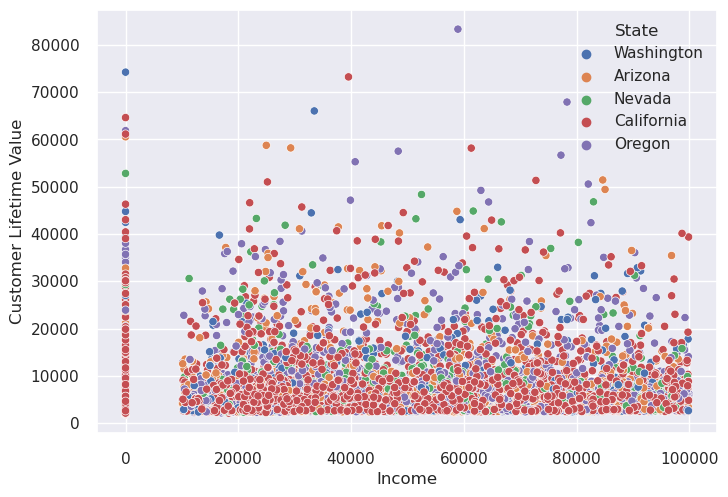

In [270]:
ax = sns.scatterplot(x="Income", y="Customer Lifetime Value", hue="State",data=df)

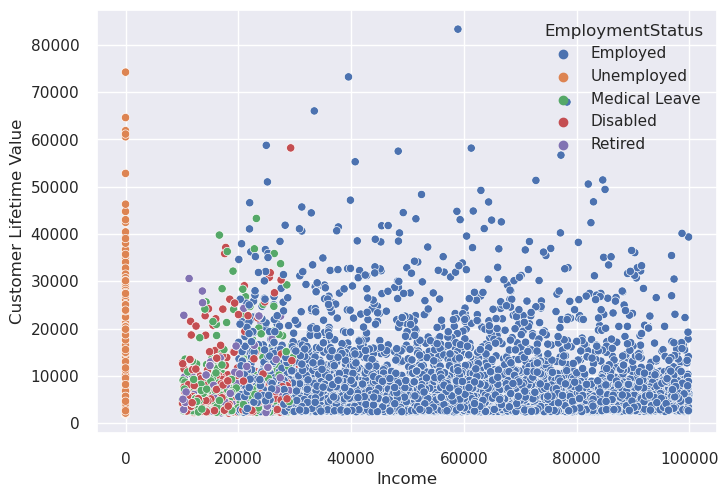

In [271]:
maritalstts = sns.scatterplot(x="Income", y="Customer Lifetime Value", hue="EmploymentStatus",data=df)

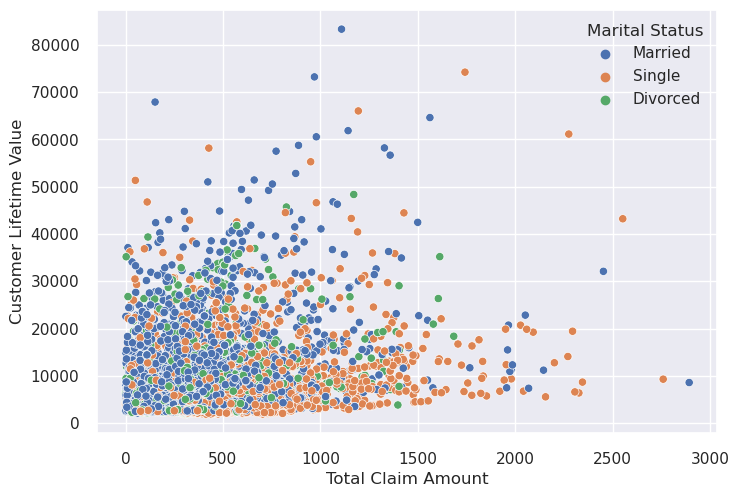

In [272]:
ax = sns.scatterplot(x="Total Claim Amount", y="Customer Lifetime Value", hue="Marital Status",
                     data=df)

## **1st Model**

After a detailed exploration of the dataset, I did not find any clear pattern to create new categorical variables from the continuous variables. Therefore, I will now proceed with creating a model to predict the Customer Life Time Value based on the available data.

In [273]:
import statsmodels.api as sm

y = new['Customer Lifetime Value']
x = new.drop('Customer Lifetime Value',axis=1)


x = sm.add_constant(x)
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.635
Model:                                 OLS   Adj. R-squared:                  0.634
Method:                      Least Squares   F-statistic:                     881.3
Date:                     Thu, 16 Feb 2023   Prob (F-statistic):               0.00
Time:                             09:59:15   Log-Likelihood:                -89055.
No. Observations:                     9134   AIC:                         1.781e+05
Df Residuals:                         9115   BIC:                         1.783e+05
Df Model:                               18                                         
Covariance Type:                 nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -4542.3757    293.171    -15.494      0.000   -5117.057   -3967.695
Income                            -0.0002      0.003     -0.079      0.937      -0.005       0.005
Monthly Premium Auto              81.0831      1.737     46.668      0.000      77.677      84.489
Months Since Last Claim            6.4917      4.325      1.501      0.133      -1.987      14.971
Months Since Policy Inception      1.5718      1.562      1.006      0.314      -1.490       4.633
Number of Open Complaints       -171.5099     47.808     -3.587      0.000    -265.224     -77.795
Total Claim Amount                -0.1930      0.225     -0.856      0.392      -0.635       0.249
Marital Status_Married            33.9681    127.171      0.267      0.789    -215.315     283.251
Marital Status_Single           -208.7504    148.349     -1.407      0.159    -499.547      82.047
Number of Policies_2             1.22e+04    113.393    107.606      0.000     1.2e+04    1.24e+04
Number of Policies_3            3600.8570    100.695     35.760      0.000    3403.473    3798.241
Education_College                -56.3720    112.894     -0.499      0.618    -277.669     164.925
Education_Doctor                 244.3697    239.216      1.022      0.307    -224.548     713.287
Education_High School or Below   211.2366    114.012      1.853      0.064     -12.253     434.726
Education_Master                 273.2142    173.096      1.578      0.115     -66.093     612.522
EmploymentStatus_Employed        674.0190    232.670      2.897      0.004     217.934    1130.104
EmploymentStatus_Medical Leave   503.8212    287.883      1.750      0.080     -60.495    1068.137
EmploymentStatus_Retired         -49.6053    323.511     -0.153      0.878    -683.759     584.549
EmploymentStatus_Unemployed       45.6754    234.824      0.195      0.846    -414.632     505.983
==============================================================================
Omnibus:                     7121.966   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           239144.603
Skew:                           3.468   Prob(JB):                         0.00
Kurtosis:                      27.089   Cond. No.                     5.54e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The next step in building the model is to split the dataset into training and testing data. This involves randomly selecting 25% of the data and setting it aside as the test data, while the remaining 75% will be used for training the model. The "test_size" parameter determines the percentage of the test data, which is set to 25% in this case. It's important to note that if the "random_state" parameter is not specified in the code, the random value generated will be different each time the code is executed, resulting in different training and test datasets.

In [274]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 300)

print('Train Data Count: {}'.format(x_train.shape[0]))
print('Test Data Count: {}'.format(x_test.shape[0]))

x_train = sm.add_constant(x_train)
results = sm.OLS(y_train, x_train).fit()
results.summary()

Train Data Count: 6850
Test Data Count: 2284


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.634
Model:                                 OLS   Adj. R-squared:                  0.633
Method:                      Least Squares   F-statistic:                     657.2
Date:                     Thu, 16 Feb 2023   Prob (F-statistic):               0.00
Time:                             09:59:15   Log-Likelihood:                -66708.
No. Observations:                     6850   AIC:                         1.335e+05
Df Residuals:                         6831   BIC:                         1.336e+05
Df Model:                               18                                         
Covariance Type:                 nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -4612.2114    340.342    -13.552      0.000   -5279.387   -3945.036
Income                             0.0036      0.003      1.275      0.202      -0.002       0.009
Monthly Premium Auto              80.8002      2.011     40.185      0.000      76.859      84.742
Months Since Last Claim            6.2716      4.953      1.266      0.205      -3.437      15.980
Months Since Policy Inception      3.0091      1.785      1.686      0.092      -0.489       6.507
Number of Open Complaints       -150.6784     55.193     -2.730      0.006    -258.873     -42.483
Total Claim Amount                -0.0287      0.261     -0.110      0.913      -0.541       0.484
Marital Status_Married            76.7742    145.736      0.527      0.598    -208.914     362.463
Marital Status_Single           -109.0662    169.711     -0.643      0.520    -441.752     223.620
Number of Policies_2            1.211e+04    129.615     93.412      0.000    1.19e+04    1.24e+04
Number of Policies_3            3597.4172    114.869     31.317      0.000    3372.237    3822.597
Education_College                -54.0298    128.567     -0.420      0.674    -306.061     198.001
Education_Doctor                 136.3148    273.817      0.498      0.619    -400.452     673.082
Education_High School or Below   131.1851    130.133      1.008      0.313    -123.916     386.286
Education_Master                 430.8026    200.025      2.154      0.031      38.692     822.914
EmploymentStatus_Employed        352.1920    268.796      1.310      0.190    -174.731     879.115
EmploymentStatus_Medical Leave   396.1279    332.086      1.193      0.233    -254.863    1047.119
EmploymentStatus_Retired        -106.1778    367.296     -0.289      0.773    -826.192     613.837
EmploymentStatus_Unemployed      -38.3180    272.254     -0.141      0.888    -572.020     495.384
==============================================================================
Omnibus:                     5279.949   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           165032.401
Skew:                           3.425   Prob(JB):                         0.00
Kurtosis:                      26.050   Cond. No.                     5.64e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

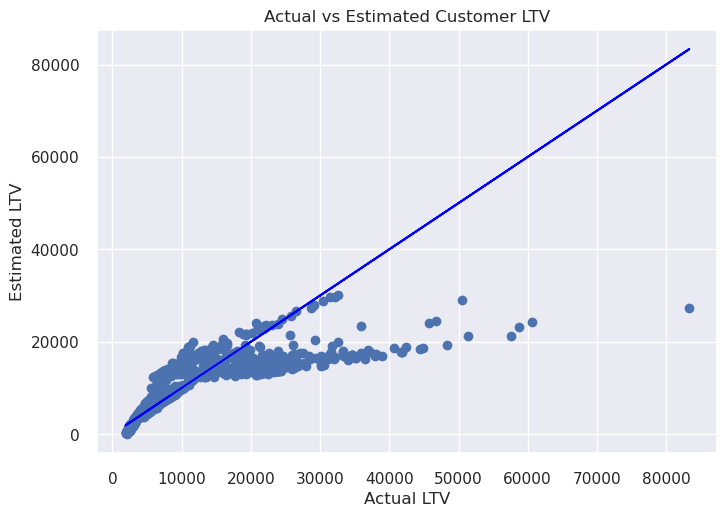

In [275]:
# Model graph to see predictions


x_test = sm.add_constant(x_test)

y_preds = results.predict(x_test)
sns.set(color_codes=True)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="blue")
plt.xlabel("Actual LTV")
plt.ylabel("Estimated LTV", )
plt.title("Actual vs Estimated Customer LTV")
plt.show()

In [276]:
#lets see their errors
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse


print("Mean Absolute Error (MAE)    : {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean Sq. Error (MSE)         : {}".format(mse(y_test, y_preds)))
print("Root Mean Sq. Error (RMSE)   : {}".format(rmse(y_test, y_preds)))
print("Mean Abs. Perc. Error (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

Mean Absolute Error (MAE)    : 2091.178737012298
Mean Sq. Error (MSE)         : 18463988.729443178
Root Mean Sq. Error (RMSE)   : 4296.974369186204
Mean Abs. Perc. Error (MAPE) : 23.38542468200489


In [277]:
score = []

score.append((results.rsquared,
                  mean_absolute_error(y_test, y_preds),
                 mse(y_test, y_preds),rmse(y_test, y_preds),
                 np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

## **2nd Model**

In [278]:
#duplicate the original data and get the log version of it to be able to reach higher R2(with outliers)
df3 = new.copy()

df3['Monthly Premium Auto'] = np.log(df2['Monthly Premium Auto'])
df3['Total Claim Amount'] = np.log(df2['Total Claim Amount'])
y = np.log(df3['Customer Lifetime Value'])

import statsmodels.api as sm


x1 =  df3.drop('Customer Lifetime Value',axis=1)

In [279]:
x1_train, x1_test, y_train, y_test = train_test_split(x1, y, test_size = 0.25, random_state = 450)

print('Train Data Count: {}'.format(x1_train.shape[0]))
print('Test Data Count: {}'.format(x1_test.shape[0]))

x1_train = sm.add_constant(x1_train)
results_log = sm.OLS(y_train, x1_train).fit()
results_log.summary()

Train Data Count: 6850
Test Data Count: 2284


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.903
Model:                                 OLS   Adj. R-squared:                  0.902
Method:                      Least Squares   F-statistic:                     3514.
Date:                     Thu, 16 Feb 2023   Prob (F-statistic):               0.00
Time:                             09:59:16   Log-Likelihood:                 1181.3
No. Observations:                     6850   AIC:                            -2325.
Df Residuals:                         6831   BIC:                            -2195.
Df Model:                               18                                         
Covariance Type:                 nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              3.6661      0.039     93.123      0.000       3.589       3.743
Income                          1.915e-07   1.43e-07      1.344      0.179   -8.78e-08    4.71e-07
Monthly Premium Auto               0.9866      0.009    112.080      0.000       0.969       1.004
Months Since Last Claim            0.0006      0.000      2.363      0.018    9.82e-05       0.001
Months Since Policy Inception     -0.0001   8.85e-05     -1.172      0.241      -0.000    6.98e-05
Number of Open Complaints         -0.0200      0.003     -7.350      0.000      -0.025      -0.015
Total Claim Amount                -0.0005      0.003     -0.144      0.885      -0.007       0.006
Marital Status_Married             0.0031      0.007      0.438      0.662      -0.011       0.017
Marital Status_Single             -0.0346      0.008     -4.172      0.000      -0.051      -0.018
Number of Policies_2               1.3976      0.006    217.141      0.000       1.385       1.410
Number of Policies_3               0.6925      0.006    121.203      0.000       0.681       0.704
Education_College                 -0.0061      0.006     -0.957      0.339      -0.019       0.006
Education_Doctor                   0.0182      0.014      1.322      0.186      -0.009       0.045
Education_High School or Below     0.0110      0.006      1.712      0.087      -0.002       0.024
Education_Master                   0.0256      0.010      2.599      0.009       0.006       0.045
EmploymentStatus_Employed          0.0671      0.013      5.101      0.000       0.041       0.093
EmploymentStatus_Medical Leave     0.0281      0.016      1.733      0.083      -0.004       0.060
EmploymentStatus_Retired          -0.0067      0.018     -0.367      0.713      -0.043       0.029
EmploymentStatus_Unemployed       -0.0157      0.013     -1.184      0.236      -0.042       0.010
==============================================================================
Omnibus:                     2395.926   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10542.490
Skew:                           1.663   Prob(JB):                         0.00
Kurtosis:                       8.086   Cond. No.                     7.99e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.99e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

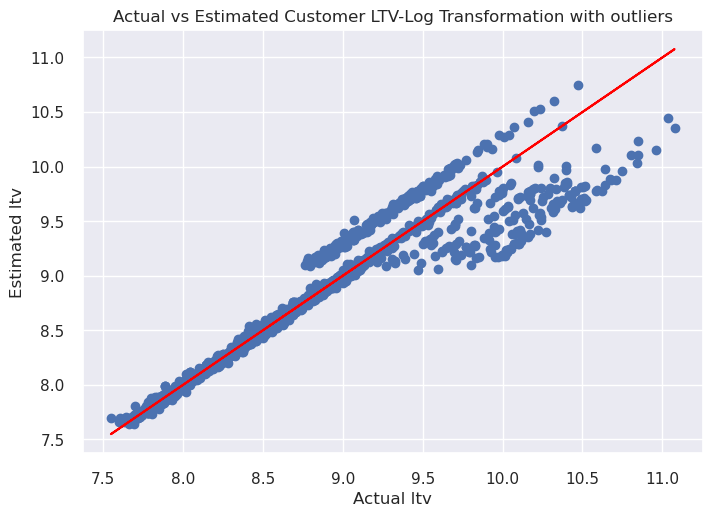

In [280]:
# Model graph to see predictions


x1_test = sm.add_constant(x1_test)

y_preds = results_log.predict(x1_test)
sns.set(color_codes=True)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual ltv")
plt.ylabel("Estimated ltv", )
plt.title("Actual vs Estimated Customer LTV-Log Transformation with outliers")
plt.show()

In [281]:
print("Mean Absolute Error (MAE)    : {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean Sq. Error (MSE)         : {}".format(mse(y_test, y_preds)))
print("Root Mean Sq. Error (RMSE)   : {}".format(rmse(y_test, y_preds)))
print("Mean Abs. Perc. Error (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

Mean Absolute Error (MAE)    : 0.1043006602692063
Mean Sq. Error (MSE)         : 0.0429259247198852
Root Mean Sq. Error (RMSE)   : 0.20718572518367476
Mean Abs. Perc. Error (MAPE) : 1.098604973932753


In [282]:
exp_ypreds = np.exp(y_preds)
exp_ytest = np.exp(y_test)

In [283]:
print("Mean Absolute Error (MAE)    : {}".format(mean_absolute_error(exp_ytest, exp_ypreds)))
print("Mean Sq. Error (MSE)         : {}".format(mse(exp_ytest, exp_ypreds)))
print("Root Mean Sq. Error (RMSE)   : {}".format(rmse(exp_ytest, exp_ypreds)))
print("Mean Abs. Perc. Error (MAPE) : {}".format(np.mean(np.abs((exp_ytest - exp_ypreds) / exp_ytest)) * 100))

Mean Absolute Error (MAE)    : 1561.2804657012794
Mean Sq. Error (MSE)         : 16187540.392103557
Root Mean Sq. Error (RMSE)   : 4023.374254541026
Mean Abs. Perc. Error (MAPE) : 9.977385043369075


In [284]:
score.append((results.rsquared,
                  mean_absolute_error(exp_ytest, exp_ypreds),
                 mse(exp_ytest, exp_ypreds),rmse(exp_ytest, exp_ypreds),
                 np.mean(np.abs((exp_ytest - exp_ypreds) / exp_ytest)) * 100))

## **4th Model**

In [285]:
#duplicate the original data and winsorize the data at %5
df4 = new.copy()

df4['Monthly Premium Auto'] = winsorize(df4['Monthly Premium Auto'],(0, 0.05))
df4['Total Claim Amount'] = winsorize(df4['Total Claim Amount'],(0, 0.05))


y = df4['Customer Lifetime Value']
x3 =  df4.drop('Customer Lifetime Value',axis=1)

In [286]:
x3_train, x3_test, y_train, y_test = train_test_split(x3, y, test_size = 0.25, random_state = 450)

print('Train Data Count: {}'.format(x3_train.shape[0]))
print('Test Data Count: {}'.format(x3_test.shape[0]))


x3_train = sm.add_constant(x3_train)
results_wins = sm.OLS(y_train, x3_train).fit()
results_wins.summary()

Train Data Count: 6850
Test Data Count: 2284


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.627
Model:                                 OLS   Adj. R-squared:                  0.626
Method:                      Least Squares   F-statistic:                     638.1
Date:                     Thu, 16 Feb 2023   Prob (F-statistic):               0.00
Time:                             09:59:16   Log-Likelihood:                -66830.
No. Observations:                     6850   AIC:                         1.337e+05
Df Residuals:                         6831   BIC:                         1.338e+05
Df Model:                               18                                         
Covariance Type:                 nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -5812.5694    355.415    -16.354      0.000   -6509.293   -5115.846
Income                            -0.0006      0.003     -0.216      0.829      -0.006       0.005
Monthly Premium Auto              95.5500      2.365     40.406      0.000      90.914     100.186
Months Since Last Claim           12.0310      5.002      2.405      0.016       2.226      21.836
Months Since Policy Inception      1.3065      1.815      0.720      0.472      -2.251       4.864
Number of Open Complaints       -139.2090     55.808     -2.494      0.013    -248.609     -29.809
Total Claim Amount                 0.3758      0.301      1.248      0.212      -0.215       0.966
Marital Status_Married          -118.1893    147.042     -0.804      0.422    -406.437     170.058
Marital Status_Single           -334.1336    170.963     -1.954      0.051    -669.274       1.007
Number of Policies_2            1.207e+04    132.006     91.406      0.000    1.18e+04    1.23e+04
Number of Policies_3            3544.6533    117.176     30.251      0.000    3314.953    3774.354
Education_College               -178.5960    131.191     -1.361      0.173    -435.772      78.580
Education_Doctor                 195.1480    281.879      0.692      0.489    -357.424     747.719
Education_High School or Below   110.1581    132.440      0.832      0.406    -149.465     369.781
Education_Master                 220.5500    202.130      1.091      0.275    -175.688     616.788
EmploymentStatus_Employed        824.8042    270.027      3.055      0.002     295.468    1354.141
EmploymentStatus_Medical Leave   471.9979    332.960      1.418      0.156    -180.707    1124.703
EmploymentStatus_Retired        -114.2044    375.266     -0.304      0.761    -849.843     621.434
EmploymentStatus_Unemployed     -102.5569    271.918     -0.377      0.706    -635.601     430.487
==============================================================================
Omnibus:                     5687.641   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           249694.883
Skew:                           3.711   Prob(JB):                         0.00
Kurtosis:                      31.632   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

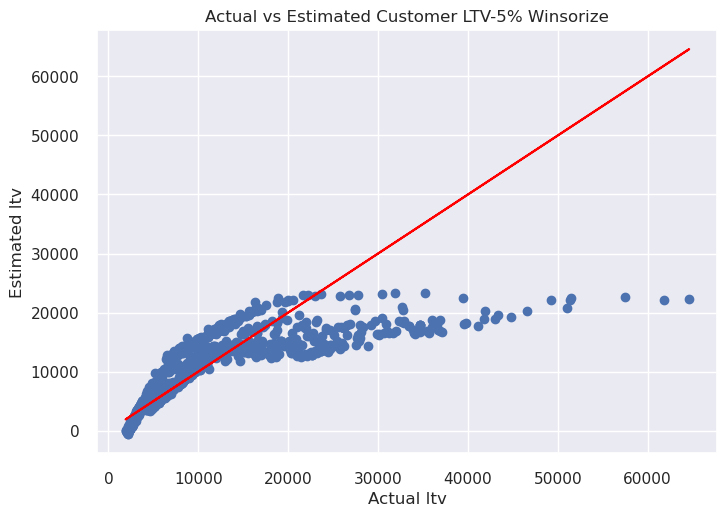

In [287]:
# Model graph to see predictions


x3_test = sm.add_constant(x3_test)

y_preds = results_wins.predict(x3_test)
sns.set(color_codes=True)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual ltv")
plt.ylabel("Estimated ltv", )
plt.title("Actual vs Estimated Customer LTV-5% Winsorize")
plt.show()

In [288]:
print("Mean Absolute Error (MAE)    : {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean Sq. Error (MSE)         : {}".format(mse(y_test, y_preds)))
print("Root Mean Sq. Error (RMSE)   : {}".format(rmse(y_test, y_preds)))
print("Mean Abs. Perc. Error (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

Mean Absolute Error (MAE)    : 2291.9617957183004
Mean Sq. Error (MSE)         : 18235432.183724992
Root Mean Sq. Error (RMSE)   : 4270.296498338844
Mean Abs. Perc. Error (MAPE) : 27.320213222574445


In [289]:
score.append((results_wins.rsquared,
                  mean_absolute_error(y_test, y_preds),
                 mse(y_test, y_preds),rmse(y_test, y_preds),
                 np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

## **4th Model**

In [290]:
#duplicate the original data and take log of the data without outlier

df5 = df4.copy()


df5['Monthly Premium Auto'] = np.log(df5['Monthly Premium Auto'])
df5['Total Claim Amount'] = np.log(df5['Total Claim Amount'])


y = np.log(df5['Customer Lifetime Value'])
x7 =df5.drop('Customer Lifetime Value',axis=1)

In [291]:
x7_train, x7_test, y_train, y_test = train_test_split(x7, y, test_size = 0.25, random_state = 450)

print('Train Data Count: {}'.format(x7_train.shape[0]))
print('Test Data Count: {}'.format(x7_test.shape[0]))


x7_train = sm.add_constant(x7_train)
results_logwins = sm.OLS(y_train, x7_train).fit()
results_logwins.summary()

Train Data Count: 6850
Test Data Count: 2284


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.897
Model:                                 OLS   Adj. R-squared:                  0.897
Method:                      Least Squares   F-statistic:                     3298.
Date:                     Thu, 16 Feb 2023   Prob (F-statistic):               0.00
Time:                             09:59:17   Log-Likelihood:                 985.64
No. Observations:                     6850   AIC:                            -1933.
Df Residuals:                         6831   BIC:                            -1803.
Df Model:                               18                                         
Covariance Type:                 nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              3.3055      0.044     75.476      0.000       3.220       3.391
Income                          1.432e-07   1.47e-07      0.977      0.329   -1.44e-07    4.31e-07
Monthly Premium Auto               1.0645      0.010    108.646      0.000       1.045       1.084
Months Since Last Claim            0.0007      0.000      2.621      0.009       0.000       0.001
Months Since Policy Inception  -6.239e-05    9.1e-05     -0.685      0.493      -0.000       0.000
Number of Open Complaints         -0.0200      0.003     -7.131      0.000      -0.025      -0.014
Total Claim Amount                 0.0029      0.003      0.885      0.376      -0.004       0.009
Marital Status_Married             0.0039      0.007      0.530      0.596      -0.011       0.018
Marital Status_Single             -0.0314      0.009     -3.676      0.000      -0.048      -0.015
Number of Policies_2               1.3962      0.007    210.820      0.000       1.383       1.409
Number of Policies_3               0.6909      0.006    117.523      0.000       0.679       0.702
Education_College                 -0.0065      0.007     -0.993      0.321      -0.019       0.006
Education_Doctor                   0.0179      0.014      1.268      0.205      -0.010       0.046
Education_High School or Below     0.0106      0.007      1.593      0.111      -0.002       0.024
Education_Master                   0.0259      0.010      2.554      0.011       0.006       0.046
EmploymentStatus_Employed          0.0717      0.014      5.293      0.000       0.045       0.098
EmploymentStatus_Medical Leave     0.0248      0.017      1.484      0.138      -0.008       0.058
EmploymentStatus_Retired          -0.0045      0.019     -0.239      0.811      -0.041       0.032
EmploymentStatus_Unemployed       -0.0199      0.014     -1.462      0.144      -0.047       0.007
==============================================================================
Omnibus:                     2245.668   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8872.706
Skew:                           1.589   Prob(JB):                         0.00
Kurtosis:                       7.581   Cond. No.                     8.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

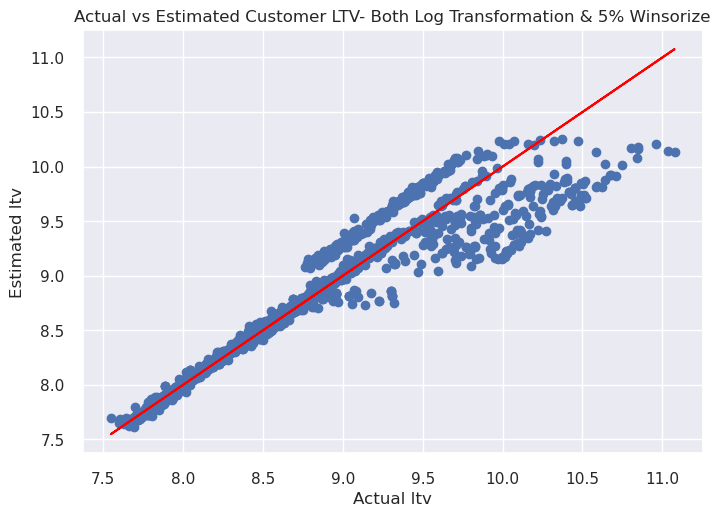

In [292]:
# Model graph to see predictions


x7_test = sm.add_constant(x7_test)

y_preds = results_logwins.predict(x7_test)
sns.set(color_codes=True)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual ltv")
plt.ylabel("Estimated ltv", )
plt.title("Actual vs Estimated Customer LTV- Both Log Transformation & 5% Winsorize")
plt.show()

In [293]:
print("Mean Absolute Error (MAE)    : {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean Sq. Error (MSE)         : {}".format(mse(y_test, y_preds)))
print("Root Mean Sq. Error (RMSE)   : {}".format(rmse(y_test, y_preds)))
print("Mean Abs. Perc. Error (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))


Mean Absolute Error (MAE)    : 0.11486223109889103
Mean Sq. Error (MSE)         : 0.04523451555851875
Root Mean Sq. Error (RMSE)   : 0.21268407452961482
Mean Abs. Perc. Error (MAPE) : 1.215496446031992


In [294]:
exp_ypreds = np.exp(y_preds)
exp_ytest = np.exp(y_test)

score.append((results_logwins.rsquared,
                  mean_absolute_error(exp_ytest, exp_ypreds),
                 mse(exp_ytest, exp_ypreds),rmse(exp_ytest, exp_ypreds),
                 np.mean(np.abs((exp_ytest - exp_ypreds) / exp_ytest)) * 100))

## **5th Model**

In [295]:
#the best model is the one with log transformation and outliers included

#Let's use polynomial features to see if we can do better


from sklearn.preprocessing import PolynomialFeatures


y = np.log(df3['Customer Lifetime Value'])
x5 =df3.drop('Customer Lifetime Value',axis=1)


pol = PolynomialFeatures()


array = pol.fit_transform(x5)

df_pol = pd.DataFrame(array)
df_pol.columns = pol.get_feature_names(x5.columns)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [296]:
df_pol_train, df_pol_test, y_train, y_test = train_test_split(df_pol, y, test_size = 0.25, random_state = 450)

print('Train Data Count: {}'.format(df_pol_train.shape[0]))
print('Test Data Count: {}'.format(df_pol_test.shape[0]))

df_pol_train = sm.add_constant(df_pol_train)
results_pol = sm.OLS(y_train, df_pol_train).fit()
results_pol.summary()

Train Data Count: 6850
Test Data Count: 2284


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.907
Model:                                 OLS   Adj. R-squared:                  0.905
Method:                      Least Squares   F-statistic:                     401.6
Date:                     Thu, 16 Feb 2023   Prob (F-statistic):               0.00
Time:                             09:59:18   Log-Likelihood:                 1334.6
No. Observations:                     6850   AIC:                            -2343.
Df Residuals:                         6687   BIC:                            -1230.
Df Model:                              162                                         
Covariance Type:                 nonrobust                                         
=================================================================================================================================
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
1                                                                 3.1958      0.484      6.596      0.000       2.246       4.146
Income                                                         2.809e-06   3.22e-06      0.872      0.383    -3.5e-06    9.12e-06
Monthly Premium Auto                                              1.1777      0.199      5.921      0.000       0.788       1.568
Months Since Last Claim                                          -0.0075      0.004     -1.901      0.057      -0.015       0.000
Months Since Policy Inception                                     0.0002      0.001      0.118      0.906      -0.003       0.003
Number of Open Complaints                                        -0.0671      0.048     -1.407      0.160      -0.161       0.026
Total Claim Amount                                               -0.0369      0.057     -0.646      0.518      -0.149       0.075
Marital Status_Married                                            0.0599      0.057      1.046      0.296      -0.052       0.172
Marital Status_Single                                             0.0396      0.069      0.577      0.564      -0.095       0.174
Number of Policies_2                                              0.7724      0.051     15.170      0.000       0.673       0.872
Number of Policies_3                                              0.3337      0.046      7.259      0.000       0.244       0.424
Education_College                                                 0.0008      0.052      0.015      0.988      -0.100       0.102
Education_Doctor                                                 -0.0299      0.113     -0.264      0.792      -0.252       0.192
Education_High School or Below                                    0.0147      0.052      0.282      0.778      -0.087       0.117
Education_Master                                                  0.0575      0.078      0.735      0.462      -0.096       0.211
EmploymentStatus_Employed                                         0.1034      0.102      1.016      0.310      -0.096       0.303
EmploymentStatus_Medical Leave                                    0.4374      0.141      3.098      0.002       0.161       0.714
EmploymentStatus_Retired                                          0.2364      0.174      1.357      0.175      -0.105       0.578
EmploymentStatus_Unemployed                                       0.1389      0.103      1.345      0.179      -0.063       0.341
Income^2                                                       6.902e-12   6.92e-12      0.997      0.319   -6.67e-12    2.05e-11
Income Monthly Premium Auto           

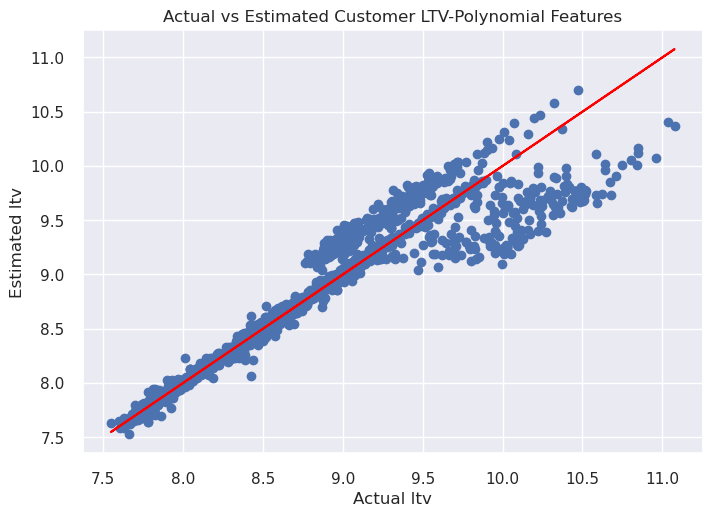

In [297]:
# Model graph to see predictions


df_pol_test = sm.add_constant(df_pol_test)

y_preds = results_pol.predict(df_pol_test)
sns.set(color_codes=True)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual ltv")
plt.ylabel("Estimated ltv", )
plt.title("Actual vs Estimated Customer LTV-Polynomial Features")
plt.show()

In [298]:
print("Mean Absolute Error (MAE)     : {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean Sq. Error (MSE)          : {}".format(mse(y_test, y_preds)))
print("Root Mean Sq. Error (RMSE)    : {}".format(rmse(y_test, y_preds)))
print("Mean Abs. Perc. Error (MAPE)  : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

Mean Absolute Error (MAE)     : 0.10925544047861335
Mean Sq. Error (MSE)          : 0.04329605533431908
Root Mean Sq. Error (RMSE)    : 0.20807704182422213
Mean Abs. Perc. Error (MAPE)  : 1.1590683027879836


In [299]:
exp_ypreds = np.exp(y_preds)
exp_ytest = np.exp(y_test)

score.append((results_pol.rsquared,
                  mean_absolute_error(exp_ytest, exp_ypreds),
                 mse(exp_ytest, exp_ypreds),rmse(exp_ytest, exp_ypreds),
                 np.mean(np.abs((exp_ytest - exp_ypreds) / exp_ytest)) * 100))

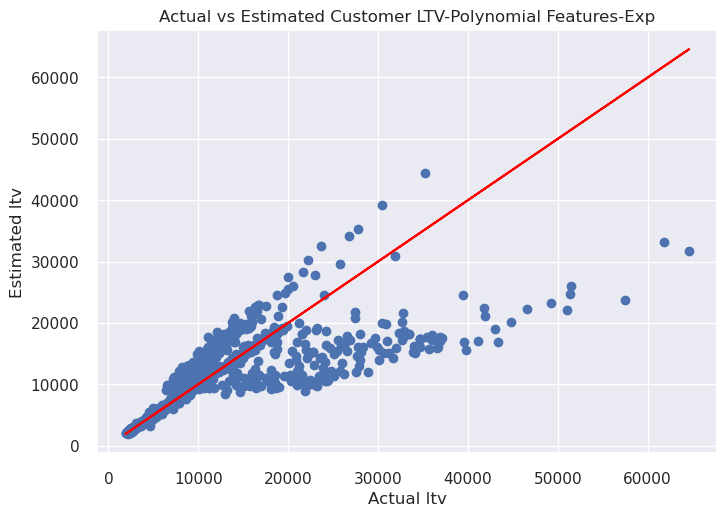

In [300]:
# Model graph to see exponential version of predictions


df_pol_test = sm.add_constant(df_pol_test)

y_preds = np.exp(results_pol.predict(df_pol_test))
sns.set(color_codes=True)
plt.scatter(exp_ytest, y_preds)
plt.plot(exp_ytest, exp_ytest, color="red")
plt.xlabel("Actual ltv")
plt.ylabel("Estimated ltv", )
plt.title("Actual vs Estimated Customer LTV-Polynomial Features-Exp")
plt.show()

Based on the graph, it appears that there is good linearity between the actual scores and predicted scores of customer life time value, but after a certain point, the linearity is not sufficient. Specifically, the graph suggests that the prediction of customer LTV is more accurate for values lower than 10,000.

To confirm this, we will check whether there is an improvement in the mean squared error term when predicting customer LTV values lower than 10,000.

In [301]:
mse( y_test[y_test<10],y_preds[y_test<10])

69854975.88072976

## **6th Model**

Incorporating polynomial features in the model has led to some improvements. However, there are still some insignificant features in the model, as evidenced by their p-values being greater than 0.05. As a result, a new model will be built by removing these insignificant features in order to better predict the target variable.

In [302]:
significant_features = list(results_pol.pvalues[results_pol.pvalues <= 0.05].index)

In [303]:
df_sig_train, df_sig_test, y_train, y_test = train_test_split(df_pol[significant_features], y, test_size = 0.25, random_state = 450)

print('Train Data Count: {}'.format(df_sig_train.shape[0]))
print('Test Data Count: {}'.format(df_sig_test.shape[0]))

df_sig_train = sm.add_constant(df_sig_train)
results_sig = sm.OLS(y_train, df_sig_train).fit()
results_sig.summary()

Train Data Count: 6850
Test Data Count: 2284


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.904
Model:                                 OLS   Adj. R-squared:                  0.904
Method:                      Least Squares   F-statistic:                     2005.
Date:                     Thu, 16 Feb 2023   Prob (F-statistic):               0.00
Time:                             09:59:19   Log-Likelihood:                 1231.6
No. Observations:                     6850   AIC:                            -2397.
Df Residuals:                         6817   BIC:                            -2172.
Df Model:                               32                                         
Covariance Type:                 nonrobust                                         
=================================================================================================================================
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
1                                                                 3.6855      0.038     97.870      0.000       3.612       3.759
Monthly Premium Auto                                              0.9923      0.008    117.515      0.000       0.976       1.009
Number of Policies_2                                              0.6689      0.011     59.008      0.000       0.647       0.691
Number of Policies_3                                              0.3463      0.003    121.774      0.000       0.341       0.352
EmploymentStatus_Medical Leave                                    0.2901      0.099      2.923      0.003       0.096       0.485
Income Months Since Last Claim                                 1.632e-08   6.03e-09      2.708      0.007    4.51e-09    2.81e-08
Monthly Premium Auto EmploymentStatus_Medical Leave              -0.1150      0.044     -2.607      0.009      -0.201      -0.029
Monthly Premium Auto EmploymentStatus_Unemployed                 -0.0479      0.014     -3.524      0.000      -0.075      -0.021
Months Since Last Claim^2                                      4.942e-06   1.17e-05      0.424      0.672   -1.79e-05    2.78e-05
Months Since Last Claim Marital Status_Married                   -0.0009      0.000     -1.921      0.055      -0.002    1.84e-05
Months Since Last Claim Number of Policies_2                      0.0021      0.001      3.793      0.000       0.001       0.003
Months Since Policy Inception Marital Status_Married          -7.106e-05      0.000     -0.599      0.549      -0.000       0.000
Months Since Policy Inception EmploymentStatus_Medical Leave     -0.0011      0.000     -2.801      0.005      -0.002      -0.000
Months Since Policy Inception EmploymentStatus_Unemployed     -7.183e-05      0.000     -0.409      0.682      -0.000       0.000
Number of Open Complaints^2                                      -0.0091      0.001     -8.258      0.000      -0.011      -0.007
Number of Open Complaints EmploymentStatus_Employed               0.0194      0.005      3.934      0.000       0.010       0.029
Total Claim Amount Marital Status_Married                         0.0049      0.002      2.229      0.026       0.001       0.009
Total Claim Amount Marital Status_Single                         -0.0029      0.003     -0.850      0.396      -0.010       0.004
Total Claim Amount EmploymentStatus_Unemployed                    0.0280      0.010      2.810      0.005       0.008       0.048
Marital Status_Married Marital Status_Single                   -2.67e-16    5.1e-16     -0.523      0.601   -1.27e-15    7.33e-16
Marital Status_Married Number of Polic

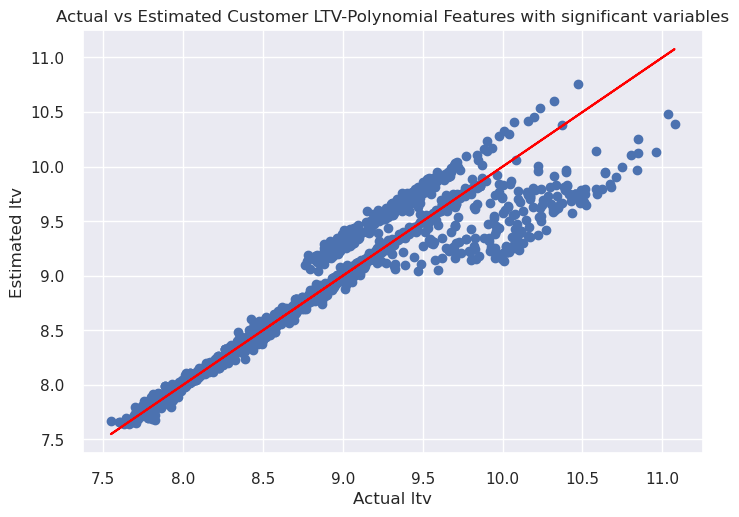

In [304]:
# Model graph to see predictions


df_sig_test = sm.add_constant(df_sig_test)

y_preds = results_sig.predict(df_sig_test)
sns.set(color_codes=True)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual ltv")
plt.ylabel("Estimated ltv" )
plt.title("Actual vs Estimated Customer LTV-Polynomial Features with significant variables")
plt.show()

In [305]:
print("Mean Absolute Error (MAE)    : {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean Sq. Error (MSE)         : {}".format(mse(y_test, y_preds)))
print("Root Mean Sq. Error (RMSE)   : {}".format(rmse(y_test, y_preds)))
print("Mean Abs. Perc. Error (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

Mean Absolute Error (MAE)    : 0.10655644036805902
Mean Sq. Error (MSE)         : 0.04300404933407627
Root Mean Sq. Error (RMSE)   : 0.2073741771148864
Mean Abs. Perc. Error (MAPE) : 1.1258593198957911


In [306]:
exp_ypreds = np.exp(y_preds)
exp_ytest = np.exp(y_test)

score.append((results_sig.rsquared,
                  mean_absolute_error(exp_ytest, exp_ypreds),
                 mse(exp_ytest, exp_ypreds),rmse(exp_ytest, exp_ypreds),
                 np.mean(np.abs((exp_ytest - exp_ypreds) / exp_ytest)) * 100))

In [307]:
dfscore = pd.DataFrame(score)

In [308]:
dfscore.index = ['Standard','Log with outliers','Without Outliers','Log without outliers','Polynomial Features','Polynomial with significant features']

dfscore.columns = ['R2', 'MAE', 'MSE','RMSE','MAPE']


dfscore

,R2,MAE,MSE,RMSE,MAPE
Standard,0.633922,2091.178737,1.846399e+07,4296.974369,23.385425
Log with outliers,0.633922,1561.280466,1.618754e+07,4023.374255,9.977385
Without Outliers,0.627046,2291.961796,1.823543e+07,4270.296498,27.320213
Log without outliers,0.896806,1653.352042,1.640889e+07,4050.788451,10.998604
Polynomial Features,0.906802,1575.529012,1.621667e+07,4026.992301,10.473670
Polynomial with significant features,0.903958,1569.713194,1.614761e+07,4018.408771,10.189247


To ensure that the model is not suffering from underfitting or overfitting problems, we will check the test/train data prediction. This will allow us to evaluate the model's performance on unseen data and determine if it is generalizing well to new data. If the model is overfitting, it will perform well on the training data but poorly on the test data, while underfitting will result in poor performance on both the training and test data.

In [309]:
from sklearn.linear_model import LinearRegression

lrm = LinearRegression()
lrm.fit(df_pol_train, y_train)

y_train_predict = lrm.predict(df_pol_train)
y_test_predict = lrm.predict(df_pol_test)

print("Train observation number  : {}".format(df_pol_train.shape[0]))
print("Test observation number   : {}".format(df_pol_test.shape[0]), "\n")

print("Train R-Square  : {}".format(lrm.score(df_pol_train, y_train)))
print("-----Test Scores---")
print("Test R-Square   : {}".format(lrm.score(df_pol_test, y_test)))
print("Mean_absolute_error (MAE)             : {}".format(mean_absolute_error(y_test, y_test_predict)))
print("Mean squared error (MSE)              : {}".format(mse(y_test, y_test_predict)))
print("Root mean squared error(RMSE)         : {}".format(rmse(y_test, y_test_predict)))
print("Mean absolute percentage error (MAPE) : {}".format(np.mean(np.abs((y_test - y_test_predict) / y_test)) * 100))

Train observation number  : 6850
Test observation number   : 2284 

Train R-Square  : 0.9068016477332331
-----Test Scores---
Test R-Square   : 0.898942710627933
Mean_absolute_error (MAE)             : 0.10925546698190375
Mean squared error (MSE)              : 0.0432960551308831
Root mean squared error(RMSE)         : 0.20807704133537439
Mean absolute percentage error (MAPE) : 1.1590686069581442


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.790e+02, tolerance: 2.915e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


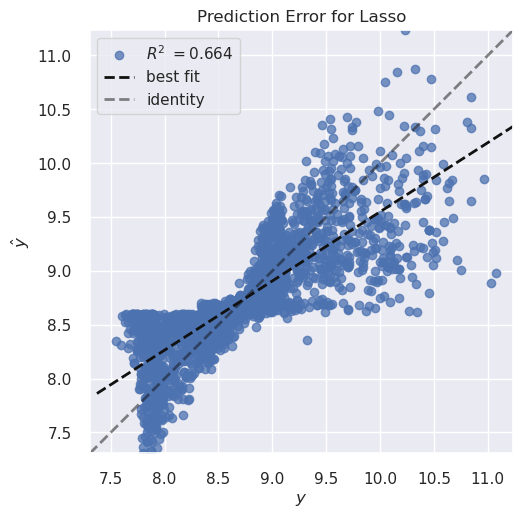

<AxesSubplot:title={'center':'Prediction Error for Lasso'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [310]:
from sklearn.linear_model import Lasso
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError


# Create the train and test data
df_pol_train, df_pol_test, y_train, y_test = train_test_split(df_pol, y, test_size = 0.25, random_state = 450)

# Instantiate the linear model and visualizer
model = Lasso()
visualizer = PredictionError(model)

visualizer.fit(df_pol_train, y_train)  # Fit the training data to the visualizer
visualizer.score(df_pol_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.0236e-23): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


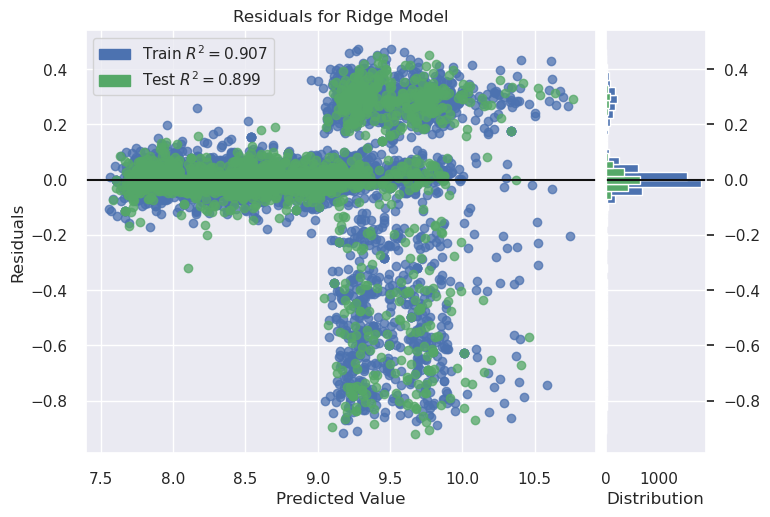

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [312]:
from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot


# Instantiate the linear model and visualizer
Model = Ridge()
visualizer_residual = ResidualsPlot(Model)

visualizer_residual.fit(df_pol_train, y_train)  # Fit the training data to the visualizer
visualizer_residual.score(df_pol_test, y_test)  # Evaluate the model on the test data
visualizer_residual.show()                

In conclusion, we have created six different models to find the best one with the highest R-squared value and lowest error terms. Based on our comparison table, we have decided to use the fifth model which incorporates both log transformation and polynomial features. The high R-squared value of 0.91 indicates that 91% of the variance in the data can be explained by the model, which is quite impressive.

Overall, the model does a good job of predicting customer life time values, with a strong linear relationship between actual and predicted scores. However, the linearity decreases after a certain point, and we found that the model performs better at predicting values lower than 10,000. By focusing on these lower values, we were able to decrease the mean squared error from 0.04 to 0.02, which is almost half of the initial error.

We also checked for overfitting, and did not find any issues with the model. However, we also explored Lasso and Ridge models to see if they would provide any improvements.

From a marketing perspective, the model allows us to identify customers with higher predicted life time values, which can be helpful in directing marketing activities towards more profitable channels.